In [2]:
%load_ext IPython.extensions.autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [4]:
import sys
sys.path.append('../..')
from model import FinData
from model import train_valid_split
from model import CatboostFinModel
from backtests import Backtest

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
df = ['Sber']

end_date = dt.datetime(2024, 12, 20)
start_date = dt.datetime(2024, 9, 10)
st_date = dt.datetime(2024, 8, 1)

history = {"Sber" : [], "MTS" : [], "Yandex" : [], "MMK" : [], "Gazprom" : []}
df = ["Sber", "MTS", "Yandex", "MMK", ""]
money = 5000

while start_date < end_date:
        args = {"iterations" : 3000, 
                "depth" : 5, 
                "learning_rate" : 0.01, 
                "use_best_model" : True, 
                "l2_leaf_reg" : 200,
                "loss_function" : 'Logloss', 
                "eval_metric" : 'Logloss', 
                "cat_features" : [], 
                "class_weights" : [1, 0.4],
                "random_state" : 42,
                "verbose" : 500,
                "early_stopping_rounds" : 500}

        dfs = ["../../datasets/" + stock + '_10_min.csv' for stock in df]
        backtest = Backtest(strategies=['long'], args=args, dfs=dfs, comissions=[0.0004])

        custom_datasets_args = {'start_dt': st_date, 
                                'end_dt': start_date, 
                                'train_size': dt.timedelta(days=30), 'val_size': dt.timedelta(5), 'test_size' : None}
        sm, money = backtest.test_trading(budget=money, custom_datasets_args=custom_datasets_args, proba_limit=0.5, use_PCA=False)
        st_date = st_date + dt.timedelta(days=5)
        start_date = start_date + dt.timedelta(days=5)


2025-02-25 21:55:16,408 - INFO - Backtesting started for stock - Sber
2025-02-25 21:55:16,416 - INFO - Train dates: 2024-08-01 07:00:00 - 2024-08-30 20:40:00 | Valid dates: 2024-08-31 04:00:00 - 2024-09-04 20:40:00 | Test dates: 2024-09-05 04:00:00 - 2024-09-09 20:40:00


0:	learn: 0.6900678	test: 0.6908888	best: 0.6908888 (0)	total: 38.3ms	remaining: 1m 54s
500:	learn: 0.5043878	test: 0.5378641	best: 0.5376830 (462)	total: 16.6s	remaining: 1m 22s
1000:	learn: 0.4883516	test: 0.5418291	best: 0.5374284 (548)	total: 32.4s	remaining: 1m 4s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.5374283589
bestIteration = 548

Shrink model to first 549 iterations.


2025-02-25 21:55:52,660 - INFO - LONG! - Sber, Date&Time: 2024-09-08 18:40:00, proba: 0.5097920778136797 - I bought for 590.2 and sold for 590.9 + commission 3.7795199999999998 -> budget: 5001.820479999999
2025-02-25 21:55:53,427 - INFO - 


My budget before 5000 and after trading 5001.820479999999
Mommy, are you prod of me?
2025-02-25 21:55:59,063 - INFO - Backtesting started for stock - Sber
2025-02-25 21:55:59,066 - INFO - Train dates: 2024-08-06 07:00:00 - 2024-09-04 20:40:00 | Valid dates: 2024-09-05 04:00:00 - 2024-09-09 20:40:00 | Test dates: 2024-09-10 04:00:00 - 2024-09-14 20:40:00


0:	learn: 0.6903852	test: 0.6900962	best: 0.6900962 (0)	total: 31.1ms	remaining: 1m 33s
500:	learn: 0.5082921	test: 0.5205364	best: 0.5205167 (499)	total: 15s	remaining: 1m 15s
1000:	learn: 0.4928659	test: 0.5189920	best: 0.5189920 (1000)	total: 29.5s	remaining: 58.9s
1500:	learn: 0.4777096	test: 0.5176492	best: 0.5176492 (1500)	total: 43.9s	remaining: 43.9s
2000:	learn: 0.4629241	test: 0.5168962	best: 0.5167417 (1688)	total: 58.2s	remaining: 29.1s
2500:	learn: 0.4476568	test: 0.5160161	best: 0.5158126 (2356)	total: 1m 12s	remaining: 14.5s
2999:	learn: 0.4338726	test: 0.5161240	best: 0.5157792 (2795)	total: 1m 27s	remaining: 0us

bestTest = 0.5157791539
bestIteration = 2795

Shrink model to first 2796 iterations.


2025-02-25 21:57:26,965 - INFO - LONG! - Sber, Date&Time: 2024-09-10 08:00:00, proba: 0.6652355608811823 - I bought for 599.8 and sold for 601.6 + commission 3.8444800000000003 -> budget: 5012.376
2025-02-25 21:57:27,010 - INFO - LONG! - Sber, Date&Time: 2024-09-10 08:50:00, proba: 0.6639669608432774 - I bought for 599.3 and sold for 600.1 + commission 3.8380800000000006 -> budget: 5014.93792
2025-02-25 21:57:27,023 - INFO - LONG! - Sber, Date&Time: 2024-09-10 09:00:00, proba: 0.5274188125325248 - I bought for 600.1 and sold for 601.2 + commission 3.844160000000001 -> budget: 5019.893760000001
2025-02-25 21:57:27,055 - INFO - LONG! - Sber, Date&Time: 2024-09-10 09:40:00, proba: 0.5361454483698995 - I bought for 599.5 and sold for 601.0 + commission 3.8416 -> budget: 5028.052160000001
2025-02-25 21:57:27,507 - INFO - LONG! - Sber, Date&Time: 2024-09-11 05:00:00, proba: 0.5518069373638741 - I bought for 595.2 and sold for 596.3 + commission 3.8128 -> budget: 5033.039360000001
2025-02-25 

0:	learn: 0.6903677	test: 0.6901870	best: 0.6901870 (0)	total: 37.9ms	remaining: 1m 53s
500:	learn: 0.5061624	test: 0.5144825	best: 0.5144825 (500)	total: 17.3s	remaining: 1m 26s
1000:	learn: 0.4915934	test: 0.5124348	best: 0.5123582 (984)	total: 34.9s	remaining: 1m 9s
1500:	learn: 0.4764228	test: 0.5118209	best: 0.5117953 (1414)	total: 52.3s	remaining: 52.3s
2000:	learn: 0.4625448	test: 0.5110391	best: 0.5110168 (1932)	total: 1m 10s	remaining: 35.4s
2500:	learn: 0.4486400	test: 0.5103546	best: 0.5103351 (2457)	total: 1m 31s	remaining: 18.2s


2025-02-25 21:59:24,032 - INFO - LONG! - Sber, Date&Time: 2024-09-15 04:00:00, proba: 0.5635880927926926 - I bought for 608.0 and sold for 609.0 + commission 3.8944 -> budget: 5072.5904


2999:	learn: 0.4354655	test: 0.5103615	best: 0.5102596 (2821)	total: 1m 48s	remaining: 0us

bestTest = 0.5102596152
bestIteration = 2821

Shrink model to first 2822 iterations.


2025-02-25 21:59:24,148 - INFO - LONG! - Sber, Date&Time: 2024-09-15 05:30:00, proba: 0.5100333122187013 - I bought for 608.0 and sold for 608.1 + commission 3.89152 -> budget: 5069.49888
2025-02-25 21:59:24,253 - INFO - LONG! - Sber, Date&Time: 2024-09-15 06:40:00, proba: 0.5421215526032707 - I bought for 608.4 and sold for 608.3 + commission 3.8934399999999996 -> budget: 5064.80544
2025-02-25 21:59:24,268 - INFO - LONG! - Sber, Date&Time: 2024-09-15 06:50:00, proba: 0.5225790255016892 - I bought for 608.3 and sold for 609.1 + commission 3.8956800000000005 -> budget: 5067.309760000001
2025-02-25 21:59:24,397 - INFO - LONG! - Sber, Date&Time: 2024-09-15 08:40:00, proba: 0.5294952776597456 - I bought for 608.4 and sold for 608.5 + commission 3.8940800000000007 -> budget: 5064.215680000001
2025-02-25 21:59:24,888 - INFO - LONG! - Sber, Date&Time: 2024-09-15 14:20:00, proba: 0.5147752292565514 - I bought for 608.8 and sold for 608.8 + commission 3.89632 -> budget: 5060.319360000001
2025-0

0:	learn: 0.6902436	test: 0.6903667	best: 0.6903667 (0)	total: 56.8ms	remaining: 2m 50s
500:	learn: 0.5036263	test: 0.5470929	best: 0.5468025 (428)	total: 15.5s	remaining: 1m 17s
1000:	learn: 0.4887193	test: 0.5465041	best: 0.5464915 (985)	total: 31.3s	remaining: 1m 2s
1500:	learn: 0.4723083	test: 0.5453192	best: 0.5451855 (1450)	total: 52.9s	remaining: 52.9s
2000:	learn: 0.4568411	test: 0.5446597	best: 0.5445537 (1798)	total: 1m 8s	remaining: 34.4s
2500:	learn: 0.4426087	test: 0.5449388	best: 0.5443294 (2147)	total: 1m 23s	remaining: 16.7s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.5443294084
bestIteration = 2147

Shrink model to first 2148 iterations.


2025-02-25 22:01:06,761 - INFO - LONG! - Sber, Date&Time: 2024-09-21 04:20:00, proba: 0.5126832118162018 - I bought for 631.2 and sold for 631.7 + commission 4.04128 -> budget: 5083.818880000002
2025-02-25 22:01:06,903 - INFO - LONG! - Sber, Date&Time: 2024-09-21 07:20:00, proba: 0.54415228599585 - I bought for 630.7 and sold for 633.5 + commission 4.04544 -> budget: 5102.173440000001
2025-02-25 22:01:07,245 - INFO - LONG! - Sber, Date&Time: 2024-09-21 14:50:00, proba: 0.5777552471537414 - I bought for 632.4 and sold for 632.9 + commission 4.04896 -> budget: 5102.124480000001
2025-02-25 22:01:07,707 - INFO - LONG! - Sber, Date&Time: 2024-09-22 10:10:00, proba: 0.5205375354942468 - I bought for 633.0 and sold for 633.2 + commission 4.05184 -> budget: 5099.672640000002
2025-02-25 22:01:07,744 - INFO - LONG! - Sber, Date&Time: 2024-09-22 10:50:00, proba: 0.5024449122964456 - I bought for 633.3 and sold for 634.8 + commission 4.05792 -> budget: 5107.614720000001
2025-02-25 22:01:07,913 - I

0:	learn: 0.6903734	test: 0.6903186	best: 0.6903186 (0)	total: 33.6ms	remaining: 1m 40s
500:	learn: 0.5119369	test: 0.5305004	best: 0.5304877 (496)	total: 14.1s	remaining: 1m 10s
1000:	learn: 0.4960378	test: 0.5297866	best: 0.5297552 (992)	total: 28.6s	remaining: 57.1s
1500:	learn: 0.4810571	test: 0.5289960	best: 0.5289332 (1471)	total: 43.3s	remaining: 43.2s
2000:	learn: 0.4665726	test: 0.5288793	best: 0.5287060 (1924)	total: 57.7s	remaining: 28.8s
2500:	learn: 0.4528683	test: 0.5288321	best: 0.5285545 (2304)	total: 1m 11s	remaining: 14.3s


2025-02-25 22:02:35,308 - INFO - LONG! - Sber, Date&Time: 2024-09-25 04:50:00, proba: 0.519544879132702 - I bought for 643.8 and sold for 645.0 + commission 3.60864 -> budget: 5134.473280000002


Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.5285544776
bestIteration = 2304

Shrink model to first 2305 iterations.


2025-02-25 22:02:35,913 - INFO - LONG! - Sber, Date&Time: 2024-09-25 20:40:00, proba: 0.5383406335890574 - I bought for 640.0 and sold for 640.8 + commission 4.09856 -> budget: 5136.774720000001
2025-02-25 22:02:35,977 - INFO - LONG! - Sber, Date&Time: 2024-09-26 05:30:00, proba: 0.5055932974222667 - I bought for 640.0 and sold for 640.5 + commission 4.0976 -> budget: 5136.677120000001
2025-02-25 22:02:36,541 - INFO - LONG! - Sber, Date&Time: 2024-09-26 19:30:00, proba: 0.5147088640198906 - I bought for 639.2 and sold for 639.2 + commission 4.09088 -> budget: 5132.586240000001
2025-02-25 22:02:36,798 - INFO - LONG! - Sber, Date&Time: 2024-09-27 06:30:00, proba: 0.575116976674147 - I bought for 640.5 and sold for 640.2 + commission 4.0982400000000005 -> budget: 5126.088000000002
2025-02-25 22:02:36,845 - INFO - LONG! - Sber, Date&Time: 2024-09-27 07:30:00, proba: 0.505256065624076 - I bought for 641.7 and sold for 642.7 + commission 3.596320000000001 -> budget: 5129.491680000002
2025-02

0:	learn: 0.6902701	test: 0.6902926	best: 0.6902926 (0)	total: 26.7ms	remaining: 1m 20s
500:	learn: 0.5078875	test: 0.5282929	best: 0.5282616 (497)	total: 14s	remaining: 1m 9s
1000:	learn: 0.4911978	test: 0.5263537	best: 0.5263204 (983)	total: 27.8s	remaining: 55.6s
1500:	learn: 0.4737955	test: 0.5253589	best: 0.5251451 (1425)	total: 42.1s	remaining: 42.1s
2000:	learn: 0.4579265	test: 0.5244685	best: 0.5244183 (1999)	total: 55.8s	remaining: 27.9s
2500:	learn: 0.4439316	test: 0.5247375	best: 0.5243427 (2276)	total: 1m 9s	remaining: 13.9s


2025-02-25 22:04:01,685 - INFO - LONG! - Sber, Date&Time: 2024-09-30 04:00:00, proba: 0.5917124983124203 - I bought for 645.5 and sold for 648.2 + commission 3.6223600000000005 -> budget: 5176.882200000003


Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.5243427334
bestIteration = 2276

Shrink model to first 2277 iterations.


2025-02-25 22:04:02,218 - INFO - LONG! - Sber, Date&Time: 2024-09-30 17:20:00, proba: 0.5366475250267736 - I bought for 642.0 and sold for 642.3 + commission 4.10976 -> budget: 5175.172440000002
2025-02-25 22:04:02,376 - INFO - LONG! - Sber, Date&Time: 2024-10-01 04:00:00, proba: 0.6035606818329239 - I bought for 640.8 and sold for 641.7 + commission 4.104 -> budget: 5178.268440000003
2025-02-25 22:04:02,442 - INFO - LONG! - Sber, Date&Time: 2024-10-01 05:30:00, proba: 0.5321173332535547 - I bought for 641.1 and sold for 641.6 + commission 4.104640000000001 -> budget: 5178.163800000003
2025-02-25 22:04:03,553 - INFO - LONG! - Sber, Date&Time: 2024-10-02 15:40:00, proba: 0.5521879871423232 - I bought for 644.0 and sold for 642.5 + commission 4.1168000000000005 -> budget: 5162.047000000003
2025-02-25 22:04:03,560 - INFO - LONG! - Sber, Date&Time: 2024-10-02 16:00:00, proba: 0.5927046244031068 - I bought for 642.5 and sold for 643.3 + commission 4.11456 -> budget: 5164.332440000003
2025-0

0:	learn: 0.6902194	test: 0.6907290	best: 0.6907290 (0)	total: 38.1ms	remaining: 1m 54s
500:	learn: 0.5027931	test: 0.5654707	best: 0.5654063 (493)	total: 14.8s	remaining: 1m 13s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.5654063292
bestIteration = 493

Shrink model to first 494 iterations.


2025-02-25 22:04:40,150 - INFO - LONG! - Sber, Date&Time: 2024-10-06 12:50:00, proba: 0.5373115700842488 - I bought for 659.1 and sold for 659.8 + commission 3.69292 -> budget: 5156.077480000003
2025-02-25 22:04:40,437 - INFO - LONG! - Sber, Date&Time: 2024-10-06 20:40:00, proba: 0.5366828628049701 - I bought for 660.1 and sold for 660.9 + commission 3.6988 -> budget: 5157.978680000002
2025-02-25 22:04:40,452 - INFO - LONG! - Sber, Date&Time: 2024-10-07 04:10:00, proba: 0.5190238486476887 - I bought for 660.3 and sold for 662.1 + commission 3.7027200000000007 -> budget: 5166.875960000002
2025-02-25 22:04:41,684 - INFO - LONG! - Sber, Date&Time: 2024-10-09 05:00:00, proba: 0.5385294500534996 - I bought for 622.5 and sold for 623.0 + commission 3.9856000000000003 -> budget: 5166.890360000002
2025-02-25 22:04:42,201 - INFO - 


My budget before 5154.870400000003 and after trading 5166.890360000002
Mommy, are you prod of me?
2025-02-25 22:04:48,071 - INFO - Backtesting started for stock - 

0:	learn: 0.6900635	test: 0.6905689	best: 0.6905689 (0)	total: 34.7ms	remaining: 1m 44s
500:	learn: 0.5105654	test: 0.4877558	best: 0.4877428 (497)	total: 14.4s	remaining: 1m 11s
1000:	learn: 0.4911631	test: 0.4890662	best: 0.4868224 (596)	total: 28.2s	remaining: 56.3s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.4868223831
bestIteration = 596

Shrink model to first 597 iterations.


2025-02-25 22:05:19,634 - INFO - LONG! - Sber, Date&Time: 2024-10-11 04:00:00, proba: 0.5445338308441755 - I bought for 618.1 and sold for 620.4 + commission 3.9632 -> budget: 5181.327160000002
2025-02-25 22:05:20,407 - INFO - LONG! - Sber, Date&Time: 2024-10-12 07:20:00, proba: 0.5299952536533469 - I bought for 614.4 and sold for 614.7 + commission 3.9331199999999997 -> budget: 5179.7940400000025
2025-02-25 22:05:20,580 - INFO - LONG! - Sber, Date&Time: 2024-10-12 11:10:00, proba: 0.5404891823421242 - I bought for 613.9 and sold for 613.8 + commission 3.9286399999999997 -> budget: 5175.065400000002
2025-02-25 22:05:20,670 - INFO - LONG! - Sber, Date&Time: 2024-10-12 13:10:00, proba: 0.5170164736183462 - I bought for 613.2 and sold for 613.2 + commission 3.9244800000000004 -> budget: 5171.140920000003
2025-02-25 22:05:21,609 - INFO - LONG! - Sber, Date&Time: 2024-10-14 05:50:00, proba: 0.5094056735683982 - I bought for 612.1 and sold for 613.5 + commission 3.92192 -> budget: 5178.41900

0:	learn: 0.6899554	test: 0.6895588	best: 0.6895588 (0)	total: 44.2ms	remaining: 2m 12s
500:	learn: 0.5065434	test: 0.4727220	best: 0.4726855 (499)	total: 14.4s	remaining: 1m 12s
1000:	learn: 0.4860939	test: 0.4680886	best: 0.4680317 (992)	total: 28.1s	remaining: 56.1s
1500:	learn: 0.4672159	test: 0.4657041	best: 0.4656273 (1492)	total: 41.7s	remaining: 41.6s
2000:	learn: 0.4498414	test: 0.4654092	best: 0.4652380 (1982)	total: 55.2s	remaining: 27.6s
2500:	learn: 0.4355336	test: 0.4652749	best: 0.4651364 (2493)	total: 1m 8s	remaining: 13.7s


2025-02-25 22:06:49,891 - INFO - LONG! - Sber, Date&Time: 2024-10-15 04:00:00, proba: 0.747758840146322 - I bought for 610.2 and sold for 610.9 + commission 3.90752 -> budget: 5180.111480000002


2999:	learn: 0.4218371	test: 0.4645001	best: 0.4644968 (2995)	total: 1m 22s	remaining: 0us

bestTest = 0.4644967821
bestIteration = 2995

Shrink model to first 2996 iterations.


2025-02-25 22:06:50,562 - INFO - LONG! - Sber, Date&Time: 2024-10-16 04:20:00, proba: 0.5048101833041173 - I bought for 608.7 and sold for 608.6 + commission 3.8953600000000006 -> budget: 5175.416120000002
2025-02-25 22:06:51,893 - INFO - LONG! - Sber, Date&Time: 2024-10-18 06:10:00, proba: 0.5499899111252649 - I bought for 593.6 and sold for 593.9 + commission 3.8000000000000003 -> budget: 5174.016120000001
2025-02-25 22:06:52,404 - INFO - LONG! - Sber, Date&Time: 2024-10-19 04:10:00, proba: 0.5412731420514576 - I bought for 595.3 and sold for 597.0 + commission 3.81536 -> budget: 5183.800760000002
2025-02-25 22:06:52,453 - INFO - LONG! - Sber, Date&Time: 2024-10-19 05:10:00, proba: 0.593706891070697 - I bought for 593.7 and sold for 598.4 + commission 3.81472 -> budget: 5217.586040000001
2025-02-25 22:06:52,723 - INFO - LONG! - Sber, Date&Time: 2024-10-19 11:20:00, proba: 0.5326108515947342 - I bought for 596.5 and sold for 597.1 + commission 3.81952 -> budget: 5218.566520000001
2025

0:	learn: 0.6900617	test: 0.6901715	best: 0.6901715 (0)	total: 25.8ms	remaining: 1m 17s
500:	learn: 0.4972789	test: 0.5180705	best: 0.5180337 (488)	total: 13.8s	remaining: 1m 8s
1000:	learn: 0.4744110	test: 0.5175647	best: 0.5171435 (776)	total: 27.9s	remaining: 55.7s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.5171434588
bestIteration = 776

Shrink model to first 777 iterations.


2025-02-25 22:07:34,892 - INFO - LONG! - Sber, Date&Time: 2024-10-20 10:40:00, proba: 0.5123667716594343 - I bought for 595.4 and sold for 595.7 + commission 3.81152 -> budget: 5211.6961200000005
2025-02-25 22:07:34,953 - INFO - LONG! - Sber, Date&Time: 2024-10-20 12:10:00, proba: 0.5075979339249678 - I bought for 595.8 and sold for 595.7 + commission 3.8128 -> budget: 5207.083320000002
2025-02-25 22:07:35,217 - INFO - LONG! - Sber, Date&Time: 2024-10-20 18:00:00, proba: 0.5095281960444047 - I bought for 596.0 and sold for 596.7 + commission 3.8166400000000005 -> budget: 5208.866680000002
2025-02-25 22:07:35,373 - INFO - LONG! - Sber, Date&Time: 2024-10-20 20:20:00, proba: 0.505222656455939 - I bought for 595.0 and sold for 597.0 + commission 3.8144 -> budget: 5221.052280000002
2025-02-25 22:07:35,457 - INFO - LONG! - Sber, Date&Time: 2024-10-21 05:00:00, proba: 0.5769115720995703 - I bought for 596.4 and sold for 597.3 + commission 3.8198399999999997 -> budget: 5224.432440000001
2025-

0:	learn: 0.6897751	test: 0.6896904	best: 0.6896904 (0)	total: 38.6ms	remaining: 1m 55s
500:	learn: 0.4935382	test: 0.5249748	best: 0.5249302 (494)	total: 14.5s	remaining: 1m 12s
1000:	learn: 0.4733779	test: 0.5237067	best: 0.5237067 (1000)	total: 26.8s	remaining: 53.6s
1500:	learn: 0.4552841	test: 0.5225899	best: 0.5225899 (1500)	total: 38.7s	remaining: 38.6s
2000:	learn: 0.4386964	test: 0.5225270	best: 0.5223815 (1919)	total: 50.5s	remaining: 25.2s
2500:	learn: 0.4254895	test: 0.5224671	best: 0.5223465 (2143)	total: 1m 2s	remaining: 12.4s
2999:	learn: 0.4117137	test: 0.5226840	best: 0.5223200 (2549)	total: 1m 14s	remaining: 0us

bestTest = 0.5223199776
bestIteration = 2549

Shrink model to first 2550 iterations.


2025-02-25 22:08:59,418 - INFO - LONG! - Sber, Date&Time: 2024-10-26 17:10:00, proba: 0.5467731270479661 - I bought for 570.2 and sold for 571.5 + commission 4.11012 -> budget: 5237.385840000001
2025-02-25 22:08:59,716 - INFO - LONG! - Sber, Date&Time: 2024-10-27 07:30:00, proba: 0.5256323078464669 - I bought for 569.9 and sold for 570.0 + commission 4.10364 -> budget: 5234.182200000001
2025-02-25 22:09:00,117 - INFO - LONG! - Sber, Date&Time: 2024-10-27 17:30:00, proba: 0.5124303734660811 - I bought for 568.0 and sold for 567.4 + commission 4.087440000000001 -> budget: 5224.694760000001
2025-02-25 22:09:00,240 - INFO - LONG! - Sber, Date&Time: 2024-10-27 20:00:00, proba: 0.6071336851705762 - I bought for 568.2 and sold for 568.1 + commission 4.090680000000001 -> budget: 5219.704080000001
2025-02-25 22:09:00,258 - INFO - LONG! - Sber, Date&Time: 2024-10-27 20:40:00, proba: 0.5143720030082978 - I bought for 568.1 and sold for 567.0 + commission 4.08636 -> budget: 5205.7177200000015
2025

0:	learn: 0.6899439	test: 0.6900001	best: 0.6900001 (0)	total: 33.8ms	remaining: 1m 41s
500:	learn: 0.4901510	test: 0.4946545	best: 0.4946472 (499)	total: 12.6s	remaining: 1m 2s
1000:	learn: 0.4710042	test: 0.4941671	best: 0.4935991 (673)	total: 25s	remaining: 49.9s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.4935990931
bestIteration = 673

Shrink model to first 674 iterations.


2025-02-25 22:09:38,389 - INFO - 


My budget before 5193.198720000002 and after trading 5193.198720000002
Mommy, are you prod of me?
2025-02-25 22:09:43,836 - INFO - Backtesting started for stock - Sber
2025-02-25 22:09:43,839 - INFO - Train dates: 2024-09-30 04:00:00 - 2024-10-29 20:40:00 | Valid dates: 2024-10-30 04:00:00 - 2024-11-03 20:40:00 | Test dates: 2024-11-04 04:00:00 - 2024-11-08 20:40:00


0:	learn: 0.6898692	test: 0.6902918	best: 0.6902918 (0)	total: 19.6ms	remaining: 58.6s
500:	learn: 0.4852438	test: 0.5526612	best: 0.5525165 (378)	total: 12.1s	remaining: 1m
1000:	learn: 0.4685686	test: 0.5523918	best: 0.5522960 (936)	total: 24.8s	remaining: 49.6s
1500:	learn: 0.4529045	test: 0.5520109	best: 0.5519355 (1461)	total: 40.9s	remaining: 40.9s


2025-02-25 22:10:40,591 - INFO - LONG! - Sber, Date&Time: 2024-11-04 04:00:00, proba: 0.5384567699326772 - I bought for 551.1 and sold for 555.8 + commission 3.98484 -> budget: 5231.513880000001
2025-02-25 22:10:40,614 - INFO - LONG! - Sber, Date&Time: 2024-11-04 04:40:00, proba: 0.5495352598655218 - I bought for 553.1 and sold for 555.0 + commission 3.9891599999999996 -> budget: 5244.624720000001


Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.5519354601
bestIteration = 1461

Shrink model to first 1462 iterations.


2025-02-25 22:10:41,025 - INFO - LONG! - Sber, Date&Time: 2024-11-04 11:30:00, proba: 0.5707647229452718 - I bought for 554.5 and sold for 555.5 + commission 3.996 -> budget: 5249.628720000001
2025-02-25 22:10:41,033 - INFO - LONG! - Sber, Date&Time: 2024-11-04 11:50:00, proba: 0.5310917856847528 - I bought for 554.8 and sold for 555.6 + commission 3.9974400000000005 -> budget: 5252.831280000001
2025-02-25 22:10:41,110 - INFO - LONG! - Sber, Date&Time: 2024-11-04 12:40:00, proba: 0.5156341448246248 - I bought for 554.1 and sold for 553.9 + commission 3.9888000000000003 -> budget: 5247.042480000001
2025-02-25 22:10:41,259 - INFO - LONG! - Sber, Date&Time: 2024-11-04 14:40:00, proba: 0.5066944033565237 - I bought for 554.1 and sold for 553.9 + commission 3.9888000000000003 -> budget: 5241.253680000001
2025-02-25 22:10:41,432 - INFO - LONG! - Sber, Date&Time: 2024-11-04 16:50:00, proba: 0.551349772297151 - I bought for 554.1 and sold for 554.2 + commission 3.9898800000000008 -> budget: 52

0:	learn: 0.6898163	test: 0.6907460	best: 0.6907460 (0)	total: 27.6ms	remaining: 1m 22s
500:	learn: 0.4824604	test: 0.5789989	best: 0.5789989 (500)	total: 14.5s	remaining: 1m 12s
1000:	learn: 0.4637172	test: 0.5785267	best: 0.5784345 (777)	total: 27.6s	remaining: 55.2s
1500:	learn: 0.4478246	test: 0.5794088	best: 0.5782466 (1087)	total: 40.9s	remaining: 40.9s


2025-02-25 22:11:32,916 - INFO - LONG! - Sber, Date&Time: 2024-11-09 08:10:00, proba: 0.5765865655408232 - I bought for 598.4 and sold for 600.3 + commission 3.8358399999999997 -> budget: 5262.73204


Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.578246576
bestIteration = 1087

Shrink model to first 1088 iterations.


2025-02-25 22:11:33,107 - INFO - LONG! - Sber, Date&Time: 2024-11-09 12:20:00, proba: 0.5735472172800632 - I bought for 599.8 and sold for 599.9 + commission 3.83904 -> budget: 5259.693
2025-02-25 22:11:33,175 - INFO - LONG! - Sber, Date&Time: 2024-11-09 13:50:00, proba: 0.5321356590360982 - I bought for 599.6 and sold for 600.9 + commission 3.8416 -> budget: 5266.2514
2025-02-25 22:11:33,294 - INFO - LONG! - Sber, Date&Time: 2024-11-09 16:30:00, proba: 0.5381687293044835 - I bought for 599.3 and sold for 599.9 + commission 3.8374399999999995 -> budget: 5267.21396
2025-02-25 22:11:33,375 - INFO - LONG! - Sber, Date&Time: 2024-11-09 18:10:00, proba: 0.5113761067933547 - I bought for 599.2 and sold for 600.0 + commission 3.8374400000000004 -> budget: 5269.776519999999
2025-02-25 22:11:33,531 - INFO - LONG! - Sber, Date&Time: 2024-11-10 04:40:00, proba: 0.5508869616294602 - I bought for 599.7 and sold for 600.4 + commission 3.8403199999999997 -> budget: 5271.536199999999
2025-02-25 22:11:

0:	learn: 0.6899131	test: 0.6902629	best: 0.6902629 (0)	total: 30.3ms	remaining: 1m 30s
500:	learn: 0.4974680	test: 0.5141743	best: 0.5141653 (497)	total: 12.1s	remaining: 1m
1000:	learn: 0.4801030	test: 0.5113807	best: 0.5113517 (990)	total: 23.6s	remaining: 47.1s
1500:	learn: 0.4622672	test: 0.5107647	best: 0.5105363 (1463)	total: 35.9s	remaining: 35.8s
2000:	learn: 0.4457807	test: 0.5109038	best: 0.5103433 (1765)	total: 47.4s	remaining: 23.7s


2025-02-25 22:12:34,425 - INFO - LONG! - Sber, Date&Time: 2024-11-14 08:00:00, proba: 0.5866054918490239 - I bought for 574.9 and sold for 563.7 + commission 4.09896 -> budget: 5177.579


Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.5103433244
bestIteration = 1765

Shrink model to first 1766 iterations.


2025-02-25 22:12:34,726 - INFO - LONG! - Sber, Date&Time: 2024-11-14 15:30:00, proba: 0.506211417847472 - I bought for 569.8 and sold for 569.3 + commission 4.10076 -> budget: 5168.9782399999995
2025-02-25 22:12:34,928 - INFO - LONG! - Sber, Date&Time: 2024-11-15 04:00:00, proba: 0.6936020860030973 - I bought for 567.9 and sold for 567.7 + commission 4.08816 -> budget: 5163.09008
2025-02-25 22:12:35,044 - INFO - LONG! - Sber, Date&Time: 2024-11-15 06:10:00, proba: 0.5051072004723985 - I bought for 569.3 and sold for 569.4 + commission 4.09932 -> budget: 5159.89076
2025-02-25 22:12:35,064 - INFO - LONG! - Sber, Date&Time: 2024-11-15 07:00:00, proba: 0.5244287570409675 - I bought for 568.8 and sold for 568.6 + commission 4.09464 -> budget: 5153.996120000001
2025-02-25 22:12:35,623 - INFO - LONG! - Sber, Date&Time: 2024-11-15 21:50:00, proba: 0.66721668333612 - I bought for 573.8 and sold for 577.1 + commission 3.6828800000000004 -> budget: 5176.713240000001
2025-02-25 22:12:35,638 - INFO

0:	learn: 0.6900242	test: 0.6900985	best: 0.6900985 (0)	total: 30.1ms	remaining: 1m 30s
500:	learn: 0.5058609	test: 0.5199602	best: 0.5199602 (500)	total: 12.1s	remaining: 1m
1000:	learn: 0.4852445	test: 0.5162299	best: 0.5162005 (998)	total: 24s	remaining: 48s
1500:	learn: 0.4641317	test: 0.5149154	best: 0.5148846 (1411)	total: 36.2s	remaining: 36.1s
2000:	learn: 0.4471482	test: 0.5144815	best: 0.5144489 (1991)	total: 47.9s	remaining: 23.9s
2500:	learn: 0.4316351	test: 0.5147488	best: 0.5142487 (2013)	total: 59.6s	remaining: 11.9s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.5142486713
bestIteration = 2013

Shrink model to first 2014 iterations.


2025-02-25 22:13:42,276 - INFO - LONG! - Sber, Date&Time: 2024-11-19 09:00:00, proba: 0.52707128771564 - I bought for 557.7 and sold for 554.4 + commission 4.003559999999999 -> budget: 5155.35008
2025-02-25 22:13:42,505 - INFO - LONG! - Sber, Date&Time: 2024-11-19 13:40:00, proba: 0.5429397048253973 - I bought for 551.9 and sold for 549.5 + commission 3.9650400000000006 -> budget: 5129.785040000001
2025-02-25 22:13:42,714 - INFO - LONG! - Sber, Date&Time: 2024-11-19 19:40:00, proba: 0.5201234833577288 - I bought for 544.7 and sold for 545.6 + commission 3.9250800000000012 -> budget: 5133.95996
2025-02-25 22:13:42,870 - INFO - LONG! - Sber, Date&Time: 2024-11-20 06:50:00, proba: 0.5913928417768444 - I bought for 545.7 and sold for 547.5 + commission 3.9355200000000004 -> budget: 5146.22444
2025-02-25 22:13:43,431 - INFO - LONG! - Sber, Date&Time: 2024-11-21 05:40:00, proba: 0.5399042863427991 - I bought for 538.1 and sold for 539.4 + commission 3.879 -> budget: 5154.04544
2025-02-25 22:

0:	learn: 0.6900688	test: 0.6906353	best: 0.6906353 (0)	total: 25.5ms	remaining: 1m 16s
500:	learn: 0.5046986	test: 0.5597785	best: 0.5596519 (450)	total: 14.7s	remaining: 1m 13s
1000:	learn: 0.4839502	test: 0.5590240	best: 0.5586667 (849)	total: 26.9s	remaining: 53.7s


2025-02-25 22:14:25,473 - INFO - LONG! - Sber, Date&Time: 2024-11-24 07:00:00, proba: 0.518260080633894 - I bought for 541.9 and sold for 542.1 + commission 3.9024000000000005 -> budget: 5111.924000000002


Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.5586667164
bestIteration = 849

Shrink model to first 850 iterations.


2025-02-25 22:14:25,845 - INFO - LONG! - Sber, Date&Time: 2024-11-24 15:10:00, proba: 0.547458716758685 - I bought for 543.3 and sold for 542.4 + commission 3.9085199999999993 -> budget: 5099.915480000002
2025-02-25 22:14:25,904 - INFO - LONG! - Sber, Date&Time: 2024-11-24 17:00:00, proba: 0.5131824134038238 - I bought for 541.2 and sold for 543.6 + commission 3.9052800000000008 -> budget: 5117.610200000002
2025-02-25 22:14:28,150 - INFO - 


My budget before 5114.026400000002 and after trading 5117.610200000002
Mommy, are you prod of me?
2025-02-25 22:14:32,759 - INFO - Backtesting started for stock - Sber
2025-02-25 22:14:32,759 - INFO - Train dates: 2024-10-25 04:00:00 - 2024-11-23 20:40:00 | Valid dates: 2024-11-24 04:00:00 - 2024-11-28 20:40:00 | Test dates: 2024-11-29 04:00:00 - 2024-12-03 20:40:00


0:	learn: 0.6902154	test: 0.6906105	best: 0.6906105 (0)	total: 23.2ms	remaining: 1m 9s
500:	learn: 0.5107389	test: 0.5532650	best: 0.5531937 (453)	total: 12.1s	remaining: 1m
1000:	learn: 0.4927360	test: 0.5538861	best: 0.5527404 (706)	total: 24.1s	remaining: 48.1s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.5527404202
bestIteration = 706

Shrink model to first 707 iterations.


2025-02-25 22:15:02,397 - INFO - LONG! - Sber, Date&Time: 2024-11-30 05:00:00, proba: 0.5172606282119889 - I bought for 544.8 and sold for 544.3 + commission 3.9207599999999996 -> budget: 5109.189440000002
2025-02-25 22:15:02,573 - INFO - LONG! - Sber, Date&Time: 2024-11-30 09:30:00, proba: 0.5108258512716349 - I bought for 544.8 and sold for 545.6 + commission 3.9254400000000005 -> budget: 5112.464000000003
2025-02-25 22:15:02,804 - INFO - LONG! - Sber, Date&Time: 2024-11-30 15:30:00, proba: 0.5031713035140466 - I bought for 545.3 and sold for 545.9 + commission 3.9283199999999994 -> budget: 5113.935680000003
2025-02-25 22:15:04,582 - INFO - 


My budget before 5117.610200000002 and after trading 5113.935680000003
Mommy, are you prod of me?
2025-02-25 22:15:09,181 - INFO - Backtesting started for stock - Sber
2025-02-25 22:15:09,197 - INFO - Train dates: 2024-10-30 04:00:00 - 2024-11-28 20:40:00 | Valid dates: 2024-11-29 04:00:00 - 2024-12-03 20:40:00 | Test dates: 2024-12-04 04:00:00

0:	learn: 0.6904009	test: 0.6898554	best: 0.6898554 (0)	total: 27.8ms	remaining: 1m 23s
500:	learn: 0.5202150	test: 0.5002181	best: 0.5002148 (499)	total: 13s	remaining: 1m 4s
1000:	learn: 0.5012657	test: 0.5002343	best: 0.4997149 (885)	total: 26.2s	remaining: 52.3s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.4997148708
bestIteration = 885

Shrink model to first 886 iterations.


2025-02-25 22:15:48,942 - INFO - LONG! - Sber, Date&Time: 2024-12-08 04:30:00, proba: 0.5096938915000225 - I bought for 558.0 and sold for 557.7 + commission 4.016520000000001 -> budget: 5107.219160000003
2025-02-25 22:15:49,570 - INFO - 


My budget before 5113.935680000003 and after trading 5107.219160000003
Mommy, are you prod of me?
2025-02-25 22:15:54,171 - INFO - Backtesting started for stock - Sber
2025-02-25 22:15:54,173 - INFO - Train dates: 2024-11-04 04:00:00 - 2024-12-03 20:40:00 | Valid dates: 2024-12-04 04:00:00 - 2024-12-08 20:40:00 | Test dates: 2024-12-09 04:00:00 - 2024-12-13 20:40:00


0:	learn: 0.6902842	test: 0.6901219	best: 0.6901219 (0)	total: 29.2ms	remaining: 1m 27s
500:	learn: 0.5128044	test: 0.5227646	best: 0.5227646 (500)	total: 12.6s	remaining: 1m 3s
1000:	learn: 0.4958532	test: 0.5213487	best: 0.5211609 (800)	total: 25.4s	remaining: 50.7s
1500:	learn: 0.4778698	test: 0.5211894	best: 0.5208068 (1423)	total: 39.3s	remaining: 39.3s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.5208068177
bestIteration = 1423

Shrink model to first 1424 iterations.


2025-02-25 22:16:48,206 - INFO - 


My budget before 5107.219160000003 and after trading 5107.219160000003
Mommy, are you prod of me?
2025-02-25 22:16:52,797 - INFO - Backtesting started for stock - Sber
2025-02-25 22:16:52,797 - INFO - Train dates: 2024-11-09 04:00:00 - 2024-12-08 20:40:00 | Valid dates: 2024-12-09 04:00:00 - 2024-12-13 20:40:00 | Test dates: 2024-12-14 04:00:00 - 2024-12-18 20:40:00


0:	learn: 0.6900023	test: 0.6904021	best: 0.6904021 (0)	total: 39.8ms	remaining: 1m 59s
500:	learn: 0.5046965	test: 0.5704690	best: 0.5694789 (296)	total: 14.3s	remaining: 1m 11s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.5694789158
bestIteration = 296

Shrink model to first 297 iterations.


2025-02-25 22:17:17,930 - INFO - 


My budget before 5107.219160000003 and after trading 5107.219160000003
Mommy, are you prod of me?


In [54]:
sm

[               datetime      budget
 0   2024-12-14 04:00:00  5107.21916
 1   2024-12-14 04:10:00  5107.21916
 2   2024-12-14 04:20:00  5107.21916
 3   2024-12-14 04:30:00  5107.21916
 4   2024-12-14 04:40:00  5107.21916
 ..                  ...         ...
 494 2024-12-18 20:00:00  5107.21916
 495 2024-12-18 20:10:00  5107.21916
 496 2024-12-18 20:20:00  5107.21916
 497 2024-12-18 20:30:00  5107.21916
 498 2024-12-18 20:40:00  5107.21916
 
 [499 rows x 2 columns]]

In [21]:
trading = ['Sber', "MTS", "Yandex", "VTB", "MMK", "Gazprom"]

dates = [dt.datetime(2024, 10, 25) + dt.timedelta(days=i, hours=2) for i in range(2, 3)]

dfs = ["../../datasets/" + stock + "_10_min.csv" for stock in trading]

args = {"iterations" : 3000, 
        "depth" : 5, 
        "learning_rate" : 0.01, 
        "use_best_model" : True, 
        "verbose": 0,
        "l2_leaf_reg" : 200,
        "loss_function" : 'Logloss', 
        "eval_metric" : 'Logloss', 
        "cat_features" : [], 
        "class_weights" : [1, 0.4],
        "random_state" : 42,
        "early_stopping_rounds" : 500}

summ = 10000
hist = []

for date in dates:
        backtest = Backtest(strategies=['long'], args=args, dfs=dfs, comissions=[0.0004])

        custom_datasets_args = {'start_dt': date, 
                                'end_dt': dt.datetime(2024, 12, 1), 
                                'train_size': 3000, 'val_size': 500, 
                                'test_size': 500
                                }
        
        new_m, new_hist = backtest.test_multistock(budget=summ, custom_datasets_args=custom_datasets_args, proba_limit=0.55, use_PCA=False)

        summ += new_m
        hist += new_hist 

print(summ)

MergeError: Incompatible merge dtype, dtype('O') and dtype('<M8[ns]'), both sides must have numeric dtype

In [20]:
trading = ['Sber', "MTS", "Yandex", "VTB", "MMK", "Gazprom"]

dates = [dt.datetime(2024, 10, 15) + dt.timedelta(days=i, hours=2) for i in range(0, 15, 3)]

dfs = ["../../datasets/" + stock + "_10_min.csv" for stock in trading]

args = [{"iterations" : 3000, 
        "depth" : 5, 
        "learning_rate" : 0.01, 
        "use_best_model" : True, 
        "l2_leaf_reg" : 200,
        "loss_function" : 'Logloss', 
        "eval_metric" : 'Logloss', 
        "cat_features" : [], 
        "class_weights" : [1, 0.35],
        "random_state" : 42,
        "early_stopping_rounds" : 500, 
        "verbose" : 0}, 
        {"iterations" : 3000, 
        "depth" : 5, 
        "learning_rate" : 0.01, 
        "use_best_model" : True, 
        "l2_leaf_reg" : 200,
        "loss_function" : 'Logloss', 
        "eval_metric" : 'Logloss', 
        "cat_features" : [], 
        "class_weights" : [0.35, 1],
        "random_state" : 42,
        "early_stopping_rounds" : 500, 
        "verbose" : 0}]

summ = 10000
hist = []

for date in dates:
        backtest = Backtest(strategies=['long-short'], args=args, dfs=dfs, comissions=[0.0004])

        custom_datasets_args = {'start_dt': date, 
                                'end_dt': dt.datetime(2024, 12, 1), 
                                'train_size': 2000, 'val_size': 500, 
                                'test_size': 300
                                }
        
        new_m, new_hist = backtest.test_multistock(budget=summ, custom_datasets_args=custom_datasets_args, proba_limit=0.55, use_PCA=True)

        summ += new_m
        hist += new_hist 

print(summ)

2025-02-25 15:29:05,324 - INFO - Training long model starterd for stock - Sber
2025-02-25 15:29:05,324 - INFO - Train dates: 2024-10-15 04:00:00 - 2024-11-04 05:30:00 | Valid dates: 2024-11-04 05:40:00 - 2024-11-09 08:10:00 | Test dates: 2024-11-09 08:20:00 - 2024-11-12 08:10:00
2025-02-25 15:29:22,562 - INFO - Training long model ended with loss {'learn': {'Logloss': 0.4421620478695895}, 'validation': {'Logloss': 0.5752965862579954}}
2025-02-25 15:29:34,727 - INFO - Training short model starterd for stock - Sber
2025-02-25 15:29:34,729 - INFO - Train dates: 2024-10-15 04:00:00 - 2024-11-04 05:30:00 | Valid dates: 2024-11-04 05:40:00 - 2024-11-09 08:10:00 | Test dates: 2024-11-09 08:20:00 - 2024-11-12 08:10:00
2025-02-25 15:29:51,292 - INFO - Training short model ended with loss {'learn': {'Logloss': 0.4586804338925722}, 'validation': {'Logloss': 0.515218389014524}}
2025-02-25 15:29:57,936 - INFO - Training long model starterd for stock - MTS
2025-02-25 15:29:57,937 - INFO - Train date

KeyboardInterrupt: 

In [105]:
import numpy as np

In [106]:
np.argsort([(1, 2, 3), (3, 2, 1), (2, 3, 4)])

array([[0, 1, 2],
       [2, 1, 0],
       [0, 1, 2]], dtype=int64)

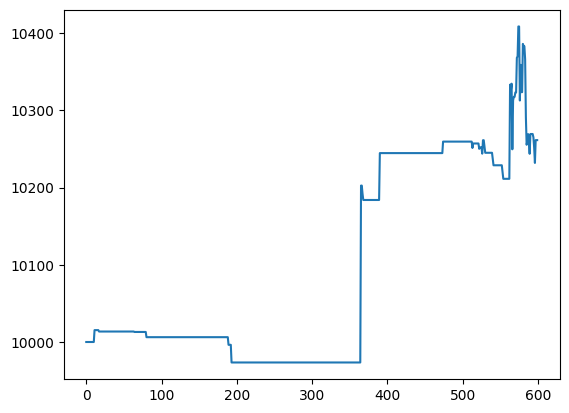

In [90]:
plt.plot(hist)